# EXAMPLE: Time series classification using <font color=magenta>CNN in Keras</font>

## $HAR$ : Humman Activity Recognition

## Example form:

## Time series classification with Tensorflow burakhimmetoglu - August 22, 2017
(https://burakhimmetoglu.com/2017/08/22/time-series-classification-with-tensorflow/)

![](https://burakhimmetoglu.files.wordpress.com/2017/08/ekg-158177_640.png)


# * [MSTC](http://mstc.ssr.upm.es/big-data-track) and MUIT: <font size=5 color='green'>Deep Learning</font>

* <font size=5 color='green'>Machine Learning Lab (MLLB)</font>

## See Notebooks in GitHub [healthDataScience](https://github.com/healthDataScience)  : $deep-learning-HAR$


![healthDataScience](https://avatars2.githubusercontent.com/u/30838413?s=200&v=4)

In [20]:
# Imports
import numpy as np
import os

import math


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline



## Some UTILITY functions

In [21]:

import pandas as pd 
import numpy as np
import os


def one_hot(labels, n_class = 6):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y
	


# Human Activity Recognition (HAR) Dataset
## From: [UCI Repository](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)



## Reading data already prepared from orignal UCI Dataset from a Shared Google Drive npz file

In [22]:
!gdown --id 1VLgB0CK8DjMJ4gstLRC0gA2pVGXy-RYa

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1VLgB0CK8DjMJ4gstLRC0gA2pVGXy-RYa
To: /content/UCI_HAR_Data.npz
100% 95.0M/95.0M [00:00<00:00, 172MB/s]


In [23]:

npzfile = np.load('UCI_HAR_Data.npz')
npzfile.files

X_train=npzfile['arr_0']
X_test=npzfile['arr_1']
labels_train=npzfile['arr_2']
labels_test=npzfile['arr_3']

print('Training data size: ',X_train.shape)
print('Test data size: ',X_test.shape)

print('Training labels size: ',labels_train.shape)
print('Test labels size: ',labels_test.shape)

Training data size:  (7352, 128, 9)
Test data size:  (2947, 128, 9)
Training labels size:  (7352,)
Test labels size:  (2947,)


## Six categories (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING).

[LSTM-Human-Activity-Recognition](https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition)

  The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window).
* The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity.
* The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used.

## ... see some labels...

WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING

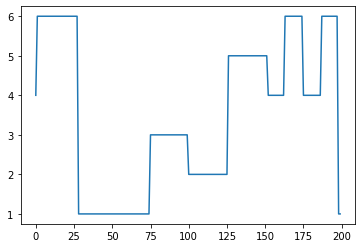

In [24]:
plt.plot(labels_train[50:250])

## ...see some signals...

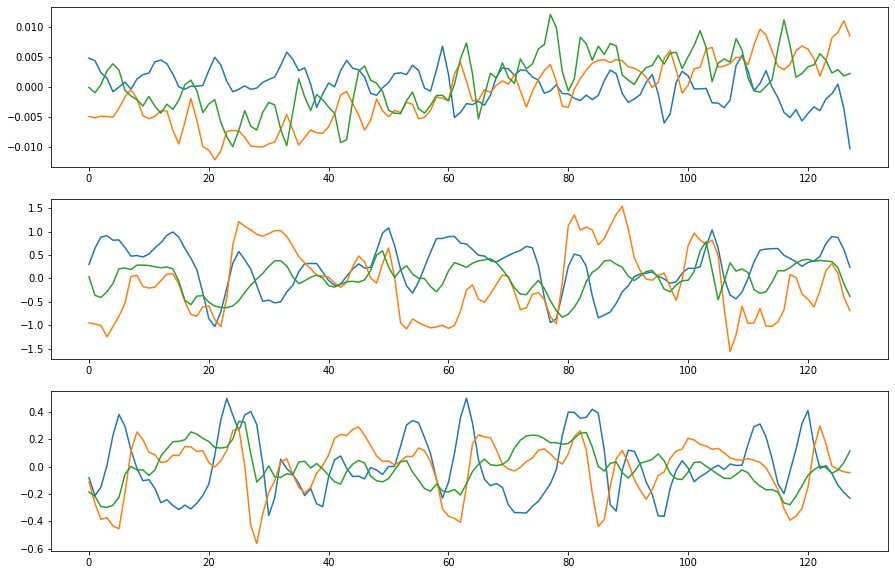

In [25]:
plt.subplots(nrows = 3, figsize = (15, 10), sharex = True)
plt.subplot(3,1,1)
plt.plot(X_train[50,:,0])
plt.plot(X_train[50,:,1])
plt.plot(X_train[50,:,2])

plt.subplot(3,1,2)
plt.plot(X_train[80,:,3])
plt.plot(X_train[80,:,4])
plt.plot(X_train[80,:,5])

plt.subplot(3,1,3)
plt.plot(X_train[110,:,0])
plt.plot(X_train[110,:,1])
plt.plot(X_train[110,:,2])

## We can plot the 9 time series as an image of size [128,9]

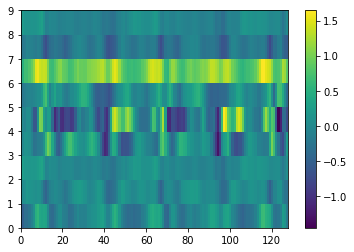

In [26]:
plt.pcolor(X_train[100].T)
plt.colorbar()

## One-hot-encoding of Labels

In [27]:
y_train = one_hot(labels_train)
y_test = one_hot(labels_test)

## Re-Shape for 2D Conv (1 D??)

In [28]:
X_train=X_train.reshape([X_train.shape[0],X_train.shape[1],X_train.shape[2],1])
X_test=X_test.reshape([X_test.shape[0],X_test.shape[1],X_test.shape[2],1])

print('Train shape=', X_train.shape , '\nTest shape=', X_test.shape)

Train shape= (7352, 128, 9, 1) 
Test shape= (2947, 128, 9, 1)



## 1.   **Define your CNN model** using Sequential() Keras:


In [29]:

from keras.models import Sequential

from keras.layers import MaxPooling2D, Dropout, Dense, Flatten

from keras.layers import Convolution2D as Conv2D

model = Sequential()
# input: 128x9 images with 1 channel -> (128, 9) tensors.
# this applies 18 convolution filters of size 2x2 each.
model.add(Conv2D(18, (2, 2), activation='relu', input_shape=(128, 9,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

## 2.   **Compile your model**. Specify loss functions and optimizers

In [30]:
from tensorflow.keras.optimizers import SGD


model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 127, 8, 18)        90        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 4, 18)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 4, 18)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 2, 64)         10432     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 1, 64)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 1, 64)        

# 3.   **Fit your model**. Train the model using data.

In [32]:
# validation_data allows to see evaluation on test while training
history=model.fit(X_train, y_train,
         epochs=30,
         batch_size=128,
         validation_data=(X_test, y_test),
         verbose=1)

Epoch 1/30
58/58 [==============================] - 1s 11ms/step - loss: 1.3496 - accuracy: 0.4512 - val_loss: 0.7697 - val_accuracy: 0.6624
Epoch 2/30
58/58 [==============================] - 0s 9ms/step - loss: 0.7054 - accuracy: 0.6532 - val_loss: 0.6370 - val_accuracy: 0.7177
Epoch 3/30
58/58 [==============================] - 0s 6ms/step - loss: 0.5746 - accuracy: 0.7364 - val_loss: 0.6167 - val_accuracy: 0.7448
Epoch 4/30
58/58 [==============================] - 0s 6ms/step - loss: 0.5253 - accuracy: 0.7707 - val_loss: 0.5866 - val_accuracy: 0.7530
Epoch 5/30
58/58 [==============================] - 0s 8ms/step - loss: 0.4708 - accuracy: 0.8047 - val_loss: 0.5717 - val_accuracy: 0.7815
Epoch 6/30
58/58 [==============================] - 0s 6ms/step - loss: 0.4310 - accuracy: 0.8229 - val_loss: 0.5508 - val_accuracy: 0.7886
Epoch 7/30
58/58 [==============================] - 0s 8ms/step - loss: 0.3969 - accuracy: 0.8429 - val_loss: 0.4983 - val_accuracy: 0.8144
Epoch 8/30
58/58 [=

## 4.   **Make predictions**. Use the model to generate predictions on new data.

In [33]:
# Check accuracy on train set

loss_train, accuracy_train = model.evaluate(X_train, y_train, batch_size=128)


print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model.evaluate(X_test, y_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

58/58 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9557

Training Accuracy= 0.9556583166122437
24/24 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.9063

Test Accuracy= 0.9063454270362854


Train Accuracy:  0.94
Test_Accuracy:  0.91


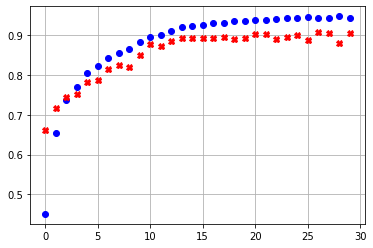

In [34]:
print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.grid()

# Get predictions / probabilities ...

In [35]:
pred_probabilities= model.predict(X_test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',y_test[0:5])

93/93 [==============================] - 0s 2ms/step
First Five Probs.:
 [[1.2118430e-05 3.6583416e-04 7.9741946e-09 2.5745394e-02 9.7387481e-01
  1.8936718e-06]
 [7.3692727e-06 1.8289369e-04 2.9058222e-09 2.7213437e-02 9.7259438e-01
  1.9238787e-06]
 [5.3479848e-06 1.7558668e-04 3.0365332e-09 2.7492547e-02 9.7232485e-01
  1.6896945e-06]
 [5.0762819e-06 1.8542531e-04 3.0623764e-09 2.6597414e-02 9.7321033e-01
  1.7781282e-06]
 [4.5673496e-06 1.1329085e-04 2.3302225e-09 2.7924431e-02 9.7195643e-01
  1.2315220e-06]]


First Five Classes:
 [[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


## Confusion Matrix

Confusion Matrix:
 [[475   8  13   0   0   0]
 [  7 434  30   0   0   0]
 [ 17  22 381   0   0   0]
 [  0  20   0 373  95   3]
 [  1   2   0  58 471   0]
 [  0   0   0   0   0 537]]


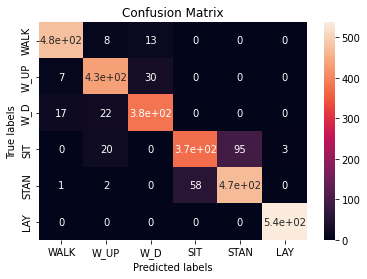

In [36]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(y_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['WALK', 'W_UP', 'W_D', 'SIT', 'STAN', 'LAY'])
ax.yaxis.set_ticklabels(['WALK', 'W_UP', 'W_D', 'SIT', 'STAN', 'LAY']);